(debugging)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Debugging

```{index} single: Debugging
```

```{contents} Contents
:depth: 2
```

```{epigraph}
"Debugging is twice as hard as writing the code in the first place.
Therefore, if you write the code as cleverly as possible, you are, by definition,
not smart enough to debug it." -- Brian Kernighan
```

## Overview

Are you one of those programmers who fills their code with `print` statements when trying to debug their programs?

Hey, we all used to do that.

(OK, sometimes we still do that...)

But once you start writing larger programs you'll need a better system.

Debugging tools for Python vary across platforms, IDEs and editors.

Here we'll focus on Jupyter and leave you to explore other settings.

We'll need the following imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

## Debugging

```{index} single: Debugging
```

### The `debug` Magic

Let's consider a simple (and rather contrived) example

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

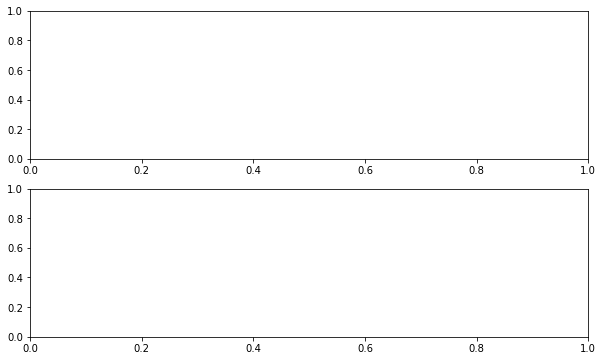

In [2]:
def plot_log():
    fig, ax = plt.subplots(2, 1)
    x = np.linspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()  # Call the function, generate plot

This code is intended to plot the `log` function over the interval $[1, 2]$.

But there's an error here: `plt.subplots(2, 1)` should be just `plt.subplots()`.

(The call `plt.subplots(2, 1)` returns a NumPy array containing two axes objects, suitable for having two subplots on the same figure)

The traceback shows that the error occurs at the method call `ax.plot(x, np.log(x))`.

The error occurs because we have mistakenly made `ax` a NumPy array, and a NumPy array has no `plot` method.

But let's pretend that we don't understand this for the moment.

We might suspect there's something wrong with `ax` but when we try to investigate this object, we get the following exception:

In [3]:
ax

NameError: name 'ax' is not defined

The problem is that `ax` was defined inside `plot_log()`, and the name is
lost once that function terminates.

Let's try doing it a different way.

We run the first cell block again, generating the same error

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

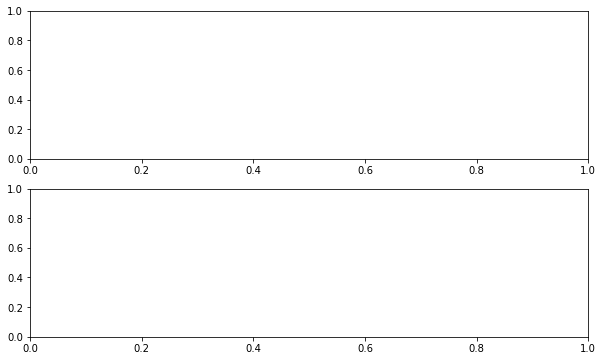

In [4]:
def plot_log():
    fig, ax = plt.subplots(2, 1)
    x = np.linspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()  # Call the function, generate plot

But this time we type in the following cell block

```{code-block} ipython
:class: no-execute
%debug
```

You should be dropped into a new prompt that looks something like this

```{code-block} ipython
:class: no-execute
ipdb>
```

(You might see pdb> instead)

Now we can investigate the value of our variables at this point in the program, step forward through the code, etc.

For example, here we simply type the name `ax` to see what's happening with
this object:

```{code-block} ipython
:class: no-execute
ipdb> ax
array([<matplotlib.axes.AxesSubplot object at 0x290f5d0>,
       <matplotlib.axes.AxesSubplot object at 0x2930810>], dtype=object)
```

It's now very clear that `ax` is an array, which clarifies the source of the
problem.

To find out what else you can do from inside `ipdb` (or `pdb`), use the
online help

```{code-block} ipython
:class: no-execute
ipdb> h

Documented commands (type help <topic>):
========================================
EOF    bt         cont      enable  jump  pdef   r        tbreak   w
a      c          continue  exit    l     pdoc   restart  u        whatis
alias  cl         d         h       list  pinfo  return   unalias  where
args   clear      debug     help    n     pp     run      unt
b      commands   disable   ignore  next  q      s        until
break  condition  down      j       p     quit   step     up

Miscellaneous help topics:
==========================
exec  pdb

Undocumented commands:
======================
retval  rv

ipdb> h c
c(ont(inue))
Continue execution, only stop when a breakpoint is encountered.
```

### Setting a Break Point

The preceding approach is handy but sometimes insufficient.

Consider the following modified version of our function above

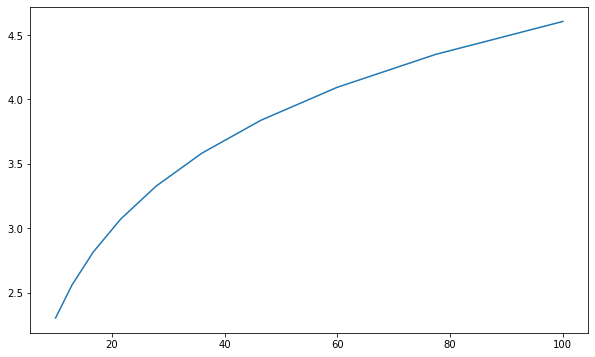

In [5]:
def plot_log():
    fig, ax = plt.subplots()
    x = np.logspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()

Here the original problem is fixed, but we've accidentally written
`np.logspace(1, 2, 10)` instead of `np.linspace(1, 2, 10)`.

Now there won't be any exception, but the plot won't look right.

To investigate, it would be helpful if we could inspect variables like `x` during execution of the function.

To this end, we add a "break point" by inserting  `breakpoint()` inside the function code block

```{code-block} python3
:class: no-execute
def plot_log():
    breakpoint()
    fig, ax = plt.subplots()
    x = np.logspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()
```

Now let's run the script, and investigate via the debugger

```{code-block} ipython
:class: no-execute
> <ipython-input-6-a188074383b7>(6)plot_log()
-> fig, ax = plt.subplots()
(Pdb) n
> <ipython-input-6-a188074383b7>(7)plot_log()
-> x = np.logspace(1, 2, 10)
(Pdb) n
> <ipython-input-6-a188074383b7>(8)plot_log()
-> ax.plot(x, np.log(x))
(Pdb) x
array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])
```

We used `n` twice to step forward through the code (one line at a time).

Then we printed the value of `x` to see what was happening with that variable.

To exit from the debugger, use `q`.

## Other Useful Magics

In this lecture, we used the `%debug` IPython magic.

There are many other useful magics:

* `%precision 4` sets printed precision for floats to 4 decimal places
* `%whos` gives a list of variables and their values
* `%quickref` gives a list of magics

The full list of magics is [here](http://ipython.readthedocs.org/en/stable/interactive/magics.html).